In [10]:
import os
import tensorflow as tf
import numpy as np

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn
import cv2

import glob

# from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout, GlobalAveragePooling2D

from tensorflow import keras
layers = keras.layers
models = keras.models

In [ ]:
!unzip kitchen.zip

In [11]:
train_dir = 'kitchen prepare final data/train'
test_dir = 'kitchen prepare final data/test'
val_dir = 'kitchen prepare final data/val'
train_dir

'kitchen prepare final data/train'

In [12]:
wood_counter = glob.glob(train_dir+"/kitchen counter type wood appliances oven microwave refrigerator sink/*")
# pneumonia_train_images = glob.glob(train_dir+"/PNEUMONIA/*.png")
l_counter = glob.glob(train_dir+"/L shape kitchen appliances oven microwave refrigerator sink and counter type stone/*")
u_counter = glob.glob(train_dir+"/u shape kitchen appliances oven microwave refrigerator sink and counter type stone/*")
# normal_train_images = glob.glob(train_dir+"/NORMAL/*.png")
print(len(wood_counter))
print(len(l_counter))
print(len(u_counter))

300
331
318


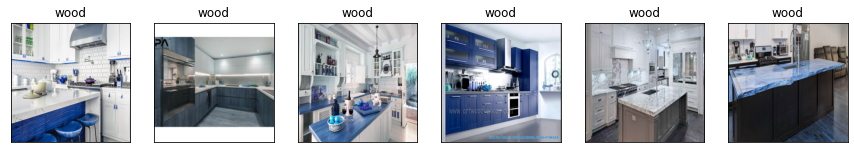

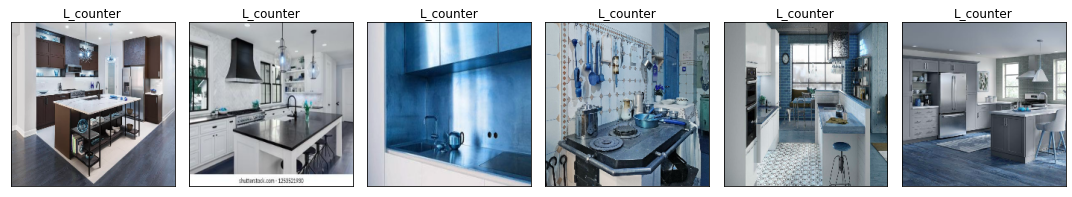

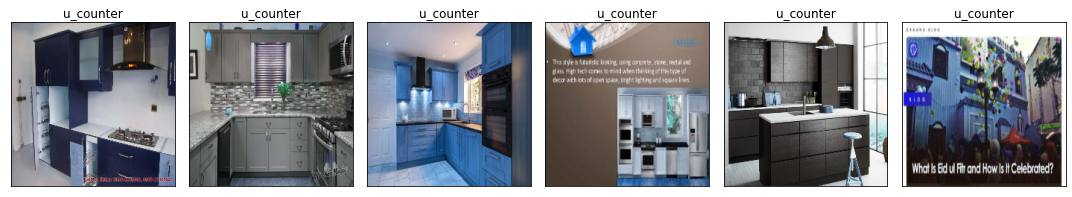

In [13]:
# e see that we have an imbalanced dataset. Hence, we will be using image augmentation techniques to compensate for this.

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(wood_counter[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("wood")
    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(l_counter[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.set_title("L_counter")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(u_counter[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.set_title("u_counter")
fig.tight_layout()    
plt.show()

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)


train_generator = train_datagen.flow_from_directory(train_dir, batch_size=32, class_mode='categorical', target_size = (220, 220))
validation_generator = val_datagen.flow_from_directory(test_dir, batch_size=32, class_mode = 'categorical', target_size=(220, 220))
test_generator = test_datagen.flow_from_directory(val_dir,shuffle=False, batch_size=32, class_mode = 'categorical', target_size=(220, 220))

Found 926 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Found 32 images belonging to 3 classes.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(220,220,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       1

In [7]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [8]:
history = model.fit(train_generator,
                    steps_per_epoch = len(train_generator),
                    epochs=10,
                    validation_data=validation_generator)

[2022-05-01 16:34:47.622 ip-172-16-62-3:23983 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-05-01 16:34:47.649 ip-172-16-62-3:23983 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 29 steps, validate for 2 steps
Epoch 1/10
29/29 [==============================] - 52s 2s/step - loss: 1.1139 - acc: 0.3704 - val_loss: 1.0784 - val_acc: 0.4667
Epoch 2/10
29/29 [==============================] - 50s 2s/step - loss: 1.0780 - acc: 0.4179 - val_loss: 1.0105 - val_acc: 0.4889
Epoch 3/10
29/29 [==============================] - 52s 2s/step - loss: 1.0742 - acc: 0.4363 - val_loss: 0.9914 - val_acc: 0.4667
Epoch 4/10
29/29 [==============================] - 51s 2s/step - loss: 1.0445 - acc: 0.4557 - val_loss: 0.9830 - val_acc: 0.5333
Epoch 5/10
29/29 [==============================] - 51s 2s/step - loss: 1.0558 - acc: 0.4428 - val_loss: 1.0503 - val_

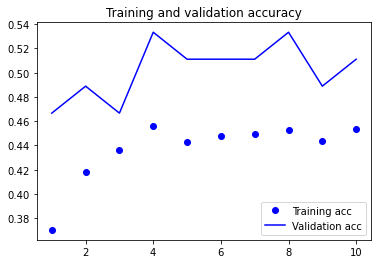

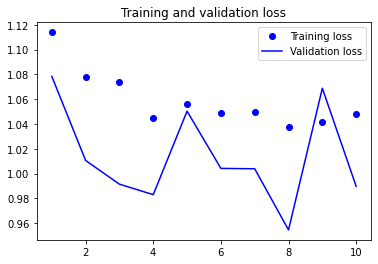

In [9]:
accuracy = history.history['acc']
val_accuracy  = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()